# Practice Embeddings 
according to deepschool.io Lesseson 06

Codes below references to deepschool.io
https://github.com/sachinruk/deepschool.io/blob/master/DL-Keras_Tensorflow/Lesson%2006%20-%20contraception.ipynb

I've added some comments for study purpose

In [1]:
import pandas as pd
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Activation, Embedding, Merge, Flatten

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, scale

import matplotlib.pyplot as plt
%matplotlib inline

/Users/grace/workspace/keras/venv/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
df = pd.read_csv('data/cmc.csv', header=None, names=['Age', 'Education', 'H_education', 'num_child', 'Religion', 'Employ', 'H_occupation', 'living_standard', 'Media_exposure', 'contraceptive'])
df.head()

,Age,Education,H_education,num_child,Religion,Employ,H_occupation,living_standard,Media_exposure,contraceptive
0,24,2,3,3,1,1,2,3,0,1
1,45,1,3,10,1,1,3,4,0,1
2,43,2,3,7,1,1,3,4,0,1
3,42,3,2,9,1,1,3,3,0,1
4,36,3,3,8,1,1,3,2,0,1


In [3]:
#check missing value
df.isnull().any()

Age                False
Education          False
H_education        False
num_child          False
Religion           False
Employ             False
H_occupation       False
living_standard    False
Media_exposure     False
contraceptive      False
dtype: bool

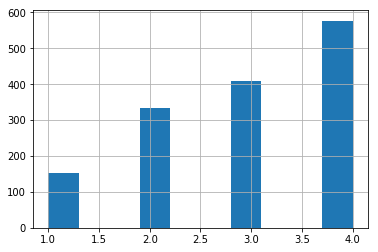

In [4]:
df.Education.hist()

In [5]:
df.shape

(1473, 10)

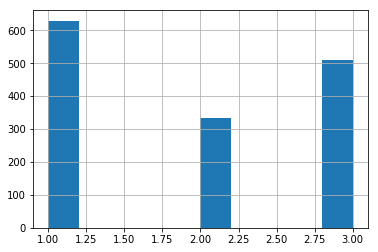

In [6]:
df.contraceptive.hist()

In [7]:
df.dtypes

Age                int64
Education          int64
H_education        int64
num_child          int64
Religion           int64
Employ             int64
H_occupation       int64
living_standard    int64
Media_exposure     int64
contraceptive      int64
dtype: object

In [8]:
def one_hot_encoding(idx):
    y = np.zeros((len(idx), max(idx)+1))
    y[np.arange(len(idx)), idx] = 1
    return y

## one hot encoding

Because categorical values designated via integer can mis-train machine learning.  

For religion categories (christianity-0, buddhaism-1, islam-2, hinduism-3, other-4)

we represent each category by one-hot encoding approach:

| original data | one-hot encoding format |
|--|--|
| | id | christianity | buddhaism | islam | hinduism | other |
| christianity | 1 | 1 | 0 | 0 | 0 | 0 |
| buddhaism | 2 | 0 | 1 | 0 | 0 | 0 |
| islam | 3 | 0 | 0 | 1 | 0 | 0 |
| hinduism | 4 | 0 | 0 | 0 | 1 | 0 |
| other | 5 | 0 | 0 | 0 | 0 | 1 |

In [9]:
idx = [0, 1, 2, 3, 4]
y = np.zeros((len(idx), max(idx)+1))
y

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [10]:
y[range(len(idx)), idx] = 1
#y[np.arange(len(idx)), idx] = 1
y

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

In [11]:
#Pandas also provides get_dummies function

pd.get_dummies(df.Education, prefix=['high_school_incomp', 'high_school_compl', 'college', 'futher_degree'])

,"['high_school_incomp', 'high_school_compl', 'college', 'futher_degree']_1","['high_school_incomp', 'high_school_compl', 'college', 'futher_degree']_2","['high_school_incomp', 'high_school_compl', 'college', 'futher_degree']_3","['high_school_incomp', 'high_school_compl', 'college', 'futher_degree']_4"
0,0,1,0,0
1,1,0,0,0
2,0,1,0,0
3,0,0,1,0
4,0,0,1,0
5,0,0,0,1
6,0,1,0,0
7,0,0,1,0
8,0,1,0,0
9,1,0,0,0


## Scaling

is to preprocess data to have average=0 and distribtuion=1.  
Scaling prevent overflow and underflow

In [12]:
old_age = df.Age
print('old mean of Age:', np.mean(old_age, axis=0))
print('old std:', np.std(old_age, axis=0))

new_age = scale(old_age)
print('new mean of Age:', np.mean(new_age, axis=0))
print('new std:', np.std(new_age, axis=0))

old mean of Age: 32.53835709436524
old std: 8.22445159811445
new mean of Age: 2.9907433548626077e-16
new std: 1.0


/Users/grace/workspace/keras/venv/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


In [14]:
# 파이프라인을 이용하기 위해서는 scale함수가 아니라 scalar 클래스를 구현해야한다.
# scale 함수와 대응되는 클래스는 StandardScaler이다

#fit으로 훈련 데이터를 활용하여 변환 계수 추정
#transform으로 실제 자료를 변환
age_child = df[['Age','num_child']]

scaler = StandardScaler()
scaler.fit(age_child)
new_age_by_class = scaler.transform(age_child)
print('old mean:', np.mean(age_child, axis=0))
print('old std:', np.std(age_child, axis=0))

print('new mean:', np.mean(new_age_by_class, axis=0))
print('new std:', np.std(new_age_by_class, axis=0))

#fit_transform()을 통해 동시에 실행가능

StandardScaler(copy=True, with_mean=True, with_std=True)

old mean: Age          32.538357
num_child     3.261371
dtype: float64
old std: Age          8.224452
num_child    2.357748
dtype: float64
new mean: [ 2.99074335e-16 -7.23566941e-18]
new std: [1. 1.]


In [15]:
scaler = StandardScaler()
df[['Age', 'num_child']] = scaler.fit_transform(df[['Age', 'num_child']])

In [16]:
x = df[['Age', 'num_child', 'Employ', 'Media_exposure']].values
y = one_hot_encoding(df.contraceptive.values-1)

In [17]:
liv_cats = df.living_standard.max()
edu_cats = df.Education.max()

liv = df.living_standard.values-1
liv_one_hot = one_hot_encoding(liv)
edu = df.Education.values-1
edu_one_hot = one_hot_encoding(edu)

In [18]:
train_x, test_x, \
train_liv, test_liv,\
train_edu, test_edu,\
train_y, test_y = train_test_split(x, liv_one_hot, edu_one_hot, y, test_size=0.1, random_state=1)

In [19]:
train_x.shape

(1325, 4)

In [20]:
train_edu.shape

(1325, 4)

In [22]:
train_liv.shape

(1325, 4)

In [23]:
#np.hstack is concatenation along the second axis
#BUT when input is 1-D array, concatenation along the first axis